# ANALIZAR LA CORRELACIÓN ENTRE EL NIVEL EDUCATIVO PARENTAL Y LA PREPARACIÓN PREVIA PARA EXÁMENES EN ESTUDIANTES DE 5º Y 6º GRADO, CONSIDERANDO EL TIPO DE ALMUERZO COMO FACTOR CLAVE EN ESTUDIANTES CON PADRES DE MENOR FORMACION EDUCATIVA

__*Ricardo Quintero, Diego Aguilar*__

## **INTRODUCCIÓN**

En este informe se busca realizar el estudio de la relación que existe entre el nivel educativo parental de los estudiantes y la preparación previa que estos poseen antes de un examen. Para ello, se analizarán las estadísticas descriptivas de cada una de las variables y posteriormente se calculará el coeficiente correlación de Pearson para observar que tan fuerte es esta correlación. Además, como la categoria "some high school" de la variable "parental level of education" se considera como valor atipico porque no sigue el comportamiento esperado, se analiza bidimensionalmente con la variable "lunch", donde se determina si el tipo de almuerzo puede influir en esta categoria sobre si los estudiantes tiendes mas a completar o no la preparacion previa al examen.

## **Primeras 5 filas de la base de datos:**

In [ ]:
#leer la base de datos en formato csv 
import pandas as pd
csv = ('C:\\Users\\User\\Desktop\\RICARDOUNI\\'
        'StudentsPerformance G5-G6 - StudentsPerformance G5-G6.csv')
df = pd.read_csv(csv)

#--TRADUCCION DEL CSV

#---renombrar variables a español
df.columns = ['Género',
              'Raza/Etnia',
              'Nivel educativo parental',
              'Tipo de almuerzo',
              'Preparación Previa al examen',
              'Nota en Matemáticas',
              'Nota en lectura',
              'Nota en escritura'
]

#---renombrar valores a español
df['Raza/Etnia'] = df['Raza/Etnia'].replace({
    'group A' : 'Grupo A',
    'group B' : 'Grupo B',
    'group C' : 'Grupo C',
    'group D' : 'Grupo D'
})

df['Género'] = df['Género'].replace({
    'male' : 'Hombre',
    'female' : 'Mujer'
})

df['Nivel educativo parental'] = df['Nivel educativo parental'].replace({
    'some high school' : 'Algún estudio de secundaria',
    'high school' : 'Escuela secundaria',
    'some college' : 'Algún estudio universitario',
    "associate's degree" : 'Título de asociado',
    "bachelor's degree" : 'Licenciatura',
    "master's degree" : 'Título de maestría'
})

df['Tipo de almuerzo'] = df['Tipo de almuerzo'].replace({
    'standard' : 'Estandar',
    'free/reduced' : 'Gratis/subsidiado'
})

df['Preparación Previa al examen'] = df['Preparación Previa al examen'].replace({
    'none' : 'Ninguna',
    'completed' : 'Completada'
})

#mostrar primeras 5 filas del csv
df.head(5).style

,Género,Raza/Etnia,Nivel educativo parental,Tipo de almuerzo,Preparación Previa al examen,Nota en Matemáticas,Nota en lectura,Nota en escritura
0,Mujer,Grupo B,Licenciatura,Estandar,Ninguna,72,72,74
1,Mujer,Grupo C,Algún estudio universitario,Estandar,Completada,69,90,88
2,Mujer,Grupo B,Título de maestría,Estandar,Ninguna,90,95,93
3,Hombre,Grupo A,Título de asociado,Gratis/subsidiado,Ninguna,47,57,44
4,Hombre,Grupo C,Algún estudio universitario,Estandar,Ninguna,76,78,75


## **Tabla bivariante**

En la siguiente tabla, se muestran la cantidad de estudiantes que completaron (o no) la preparación previa al examen, según el nivel educativo de los padres de los estudiantes.
- Cómo análisis general, se puede observar que los estudiantes tienden más a no completar el curso que si hacerlo. Concretamente, 64,2% de los estudiantes son quienes no completan el curso.

- La clase más frecuente, respecto a los estudiantes que completaron el curso, es la categoría "Título de asociado", representando a 82 de los 358 estudiantes pertenecientes a este nivel educativo parental.

In [118]:
tabla = pd.crosstab(df['Preparación Previa al examen'], 
            df['Nivel educativo parental'],
             margins=True,
            margins_name='Total'
)
tabla.style.background_gradient(cmap='Blues',low=1.0).set_caption(
'Tabla de contingencia de los niveles '
'educativos parentales por la preparación '
'previa para examenes').set_properties(
**{'text-align': 'center', 'font-size': '12pt'}
)

Nivel educativo parental,Algún estudio de secundaria,Algún estudio universitario,Escuela secundaria,Licenciatura,Título de asociado,Título de maestría,Total
Preparación Previa al examen,,,,,,,
Completada,77,77,56,46,82,20,358
Ninguna,102,149,140,72,140,39,642
Total,179,226,196,118,222,59,1000


In [115]:
#filtrar a los estudiantes que solo hayan completado la preparacion
filtro_curso = df[df['Preparación Previa al examen'] == 'Completada']

#separar en grupos a los estudiantes hayan completado la preparacion
# por el nivel educativo de los padres 
filtro_curso1 = filtro_curso.groupby('Nivel educativo parental').size()
filtro_curso1

Nivel educativo parental
Algún estudio de secundaria    77
Algún estudio universitario    77
Escuela secundaria             56
Licenciatura                   46
Título de asociado             82
Título de maestría             20
dtype: int64

([0, 1, 2, 3, 4, 5],
 [Text(0, 0, 'Algún estudio de secundaria'),
  Text(1, 0, 'Algún estudio universitario'),
  Text(2, 0, 'Escuela secundaria'),
  Text(3, 0, 'Licenciatura'),
  Text(4, 0, 'Título de asociado'),
  Text(5, 0, 'Título de maestría')])

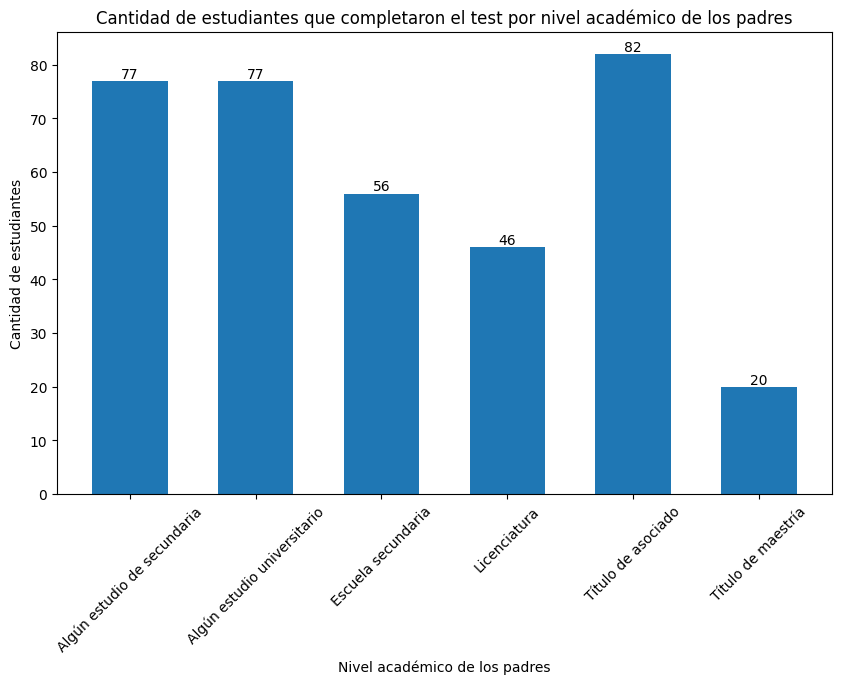

In [116]:
# --crear grafico
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
etiquetas = filtro_curso1.index
valores = filtro_curso1.values

grafico = plt.bar(etiquetas, valores,width=0.6)

plt.bar_label(grafico, labels=valores)

plt.title('Cantidad de estudiantes que completaron el '
           'test por nivel académico de los padres')

plt.xlabel('Nivel académico de los padres')
plt.ylabel('Cantidad de estudiantes')
plt.xticks(rotation=45)